<a href="https://colab.research.google.com/github/harimarasini/harimarasini/blob/main/3rd_Exam_HM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Third take home exam**

*Hari Marasini -----> ⏰ Apr 06, 2024*

### **STEP 1**

In [58]:
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [59]:
data = pd.read_csv("HorseAccelerometer.csv", na_values=['null'])

#Let's inspect columns to see if there is any missing or invalid values in our dataset

data.isna().sum()

<ipython-input-59-53498e02540c>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("HorseAccelerometer.csv", na_values=['null'])


Ax            0
Ay            0
Az            0
Gx            0
Gy            0
Gz            0
Mx       925107
My       925107
Mz       925107
A3D           0
G3D           0
M3D      925107
label    601241
dtype: int64

We see that our dataset has a lot of missing/non-numeric data on columns 'Mx', 'My', 'Mz', 'M3D' and 'label'. We also confirmed it by looking into csv file.

Now, let's pre-process our dataset by first handling missing values (filling it with mean), then dropping rows that donot have label. After that, we will scale our data and further label our catagorical data.

In [62]:
# Now, we are dropping rows with null values in 'label' column
data.dropna(subset=['label'], inplace=True)

# Here, we are filling the mean value in missing columns
imp = SimpleImputer(strategy='mean', missing_values=float('NaN'))
data[['Mx', 'My', 'Mz', 'M3D']] = imp.fit_transform(data[['Mx', 'My', 'Mz', 'M3D']])
data.head()

,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,A3D,G3D,M3D,label
458817,-7.776645,-3.208345,-6.622598,2.807617,7.568359,10.192871,-54.355718,-29.698752,-8.783801,10.706469,13.002207,76.384229,standing
458818,-7.958610,-3.160459,-6.373592,2.258301,7.507324,11.352539,-54.355718,-29.698752,-8.783801,10.674767,13.796376,76.384229,standing
458819,-8.111845,-3.107785,-6.545981,1.708984,6.896973,12.268066,-54.355718,-29.698752,-8.783801,10.877050,14.177246,76.384229,standing
458820,-8.145365,-3.131728,-6.713581,1.892090,6.835938,12.634277,-54.355718,-29.698752,-8.783801,11.010307,14.489134,76.384229,standing
458821,-8.121422,-3.265808,-6.838084,1.525879,3.723145,13.183594,-54.355718,-29.698752,-8.783801,11.107762,13.783949,76.384229,standing


In [63]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz', 'A3D', 'G3D', 'M3D']])
scaled_data = pd.DataFrame(scaled_data, columns=['Scaled_' + col for col in ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz', 'A3D', 'G3D', 'M3D']])

In [64]:
scaled_data

,Scaled_Ax,Scaled_Ay,Scaled_Az,Scaled_Gx,Scaled_Gy,Scaled_Gz,Scaled_Mx,Scaled_My,Scaled_Mz,Scaled_A3D,Scaled_G3D,Scaled_M3D
0,-0.007225,-0.647417,-0.239594,0.025677,0.084299,0.106539,9.753477e-16,2.934530e-16,2.114532e-16,-0.363181,-0.743141,-2.140530e-15
1,-0.031760,-0.642179,-0.207342,0.018956,0.083659,0.121626,9.753477e-16,2.934530e-16,2.114532e-16,-0.366551,-0.736030,-2.140530e-15
2,-0.052421,-0.636416,-0.229670,0.012235,0.077258,0.133537,9.753477e-16,2.934530e-16,2.114532e-16,-0.345046,-0.732620,-2.140530e-15
3,-0.056940,-0.639035,-0.251378,0.014476,0.076618,0.138301,9.753477e-16,2.934530e-16,2.114532e-16,-0.330880,-0.729827,-2.140530e-15
4,-0.053712,-0.653704,-0.267504,0.009995,0.043977,0.145447,9.753477e-16,2.934530e-16,2.114532e-16,-0.320519,-0.736141,-2.140530e-15
...,...,...,...,...,...,...,...,...,...,...,...,...
447329,0.318829,-1.130958,-0.154002,-0.216271,0.238547,-0.248395,9.753477e-16,2.934530e-16,2.114532e-16,-0.325015,-0.565810,-2.140530e-15
447330,0.373064,-1.109479,-0.187494,-0.241660,0.198865,-0.249983,9.753477e-16,2.934530e-16,2.114532e-16,-0.344172,-0.576282,-2.140530e-15
447331,0.388560,-1.085381,-0.201139,-0.254355,0.173904,-0.241249,9.753477e-16,2.934530e-16,2.114532e-16,-0.359064,-0.585554,-2.140530e-15
447332,0.376938,-1.071760,-0.169507,-0.270784,0.190544,-0.233309,9.753477e-16,2.934530e-16,2.114532e-16,-0.378866,-0.572748,-2.140530e-15


In [66]:
# let's label our catagorical data

unique_labels = data['label'].unique()

labels_dict = {'0': unique_labels[0],
              '1': unique_labels[1],
              '2': unique_labels[2],
              '3': unique_labels[3],
              '4': unique_labels[4],
              '5': unique_labels[5]}

reversed_dict = {value: key for key, value in labels_dict.items()}

label_transform = data['label'].to_frame()

# converting to DataFrame
label_df = pd.DataFrame(label_transform, columns=['label'])

# applying our label encoding using the dictionary
label_transform['label_encoded'] = label_df['label'].map(reversed_dict)

label_transform.drop(columns=['label'], inplace=True)
label_transform_df = label_transform.reset_index(drop=True)
label_transform_df

,label_encoded
0,0
1,0
2,0
3,0
4,0
...,...
447329,1
447330,1
447331,1
447332,1


***Now, we have successfully applied pre-processing steps. First we dropped 'null' rows from 'label' columns. Then, we filled missing values in numerical columns as their overall 'mean'. After that, we scaled the numerical data, and encoderd our catatgorical data, i.e., 'label' column.***

In [67]:
merged_data = pd.concat([scaled_data, label_transform_df], axis=1)
merged_data

,Scaled_Ax,Scaled_Ay,Scaled_Az,Scaled_Gx,Scaled_Gy,Scaled_Gz,Scaled_Mx,Scaled_My,Scaled_Mz,Scaled_A3D,Scaled_G3D,Scaled_M3D,label_encoded
0,-0.007225,-0.647417,-0.239594,0.025677,0.084299,0.106539,9.753477e-16,2.934530e-16,2.114532e-16,-0.363181,-0.743141,-2.140530e-15,0
1,-0.031760,-0.642179,-0.207342,0.018956,0.083659,0.121626,9.753477e-16,2.934530e-16,2.114532e-16,-0.366551,-0.736030,-2.140530e-15,0
2,-0.052421,-0.636416,-0.229670,0.012235,0.077258,0.133537,9.753477e-16,2.934530e-16,2.114532e-16,-0.345046,-0.732620,-2.140530e-15,0
3,-0.056940,-0.639035,-0.251378,0.014476,0.076618,0.138301,9.753477e-16,2.934530e-16,2.114532e-16,-0.330880,-0.729827,-2.140530e-15,0
4,-0.053712,-0.653704,-0.267504,0.009995,0.043977,0.145447,9.753477e-16,2.934530e-16,2.114532e-16,-0.320519,-0.736141,-2.140530e-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447329,0.318829,-1.130958,-0.154002,-0.216271,0.238547,-0.248395,9.753477e-16,2.934530e-16,2.114532e-16,-0.325015,-0.565810,-2.140530e-15,1
447330,0.373064,-1.109479,-0.187494,-0.241660,0.198865,-0.249983,9.753477e-16,2.934530e-16,2.114532e-16,-0.344172,-0.576282,-2.140530e-15,1
447331,0.388560,-1.085381,-0.201139,-0.254355,0.173904,-0.241249,9.753477e-16,2.934530e-16,2.114532e-16,-0.359064,-0.585554,-2.140530e-15,1
447332,0.376938,-1.071760,-0.169507,-0.270784,0.190544,-0.233309,9.753477e-16,2.934530e-16,2.114532e-16,-0.378866,-0.572748,-2.140530e-15,1


## **STEP 2**

In [68]:
!pip install tsflex

In [69]:
import scipy.stats as ss
from tsflex.features import MultipleFeatureDescriptors, FeatureCollection
from tsflex.utils.data import load_empatica_data

#loading our scaled data
Scaled_Ax = scaled_data["Scaled_Ax"]
Scaled_Ay = scaled_data["Scaled_Ay"]
Scaled_Az = scaled_data["Scaled_Az"]
Scaled_Gx = scaled_data["Scaled_Gx"]
Scaled_Gy = scaled_data["Scaled_Gy"]
Scaled_Gz = scaled_data["Scaled_Gz"]
Scaled_Mx = scaled_data["Scaled_Mx"]
Scaled_My = scaled_data["Scaled_My"]
Scaled_Mz = scaled_data["Scaled_Mz"]
Scaled_A3D = scaled_data["Scaled_A3D"]
Scaled_G3D = scaled_data["Scaled_G3D"]
Scaled_M3D = scaled_data["Scaled_M3D"]

# Constructing our feature extraction configuration with 10 functions
fc = FeatureCollection(
    MultipleFeatureDescriptors(
        functions=[np.mean, np.std, np.median, np.max, np.min, ss.skew, ss.kurtosis, ss.iqr, ss.variation, ss.sem],
        series_names=["Scaled_Ax", "Scaled_Ay", "Scaled_Az", "Scaled_Gx", "Scaled_Gy", "Scaled_Gz",
                      "Scaled_Mx", "Scaled_My", "Scaled_Mz", "Scaled_A3D", "Scaled_G3D", "Scaled_M3D"],
        windows=100,
        strides=50,
    )
)

# Extracting features
features = fc.calculate(data=[Scaled_Ax, Scaled_Ay, Scaled_Az, Scaled_Gx, Scaled_Gy, Scaled_Gz,
                               Scaled_Mx, Scaled_My, Scaled_Mz, Scaled_A3D, Scaled_G3D, Scaled_M3D], approve_sparsity=True)

INFO:feature_calculation_logger:Finished function [mean] on [('Scaled_Ax',)] with window-stride [100, ('50',)] with output ['Scaled_Ax__mean__w=100'] in [0.16259428799821762 seconds]!
INFO:feature_calculation_logger:Finished function [std] on [('Scaled_Ax',)] with window-stride [100, ('50',)] with output ['Scaled_Ax__std__w=100'] in [0.566863246000139 seconds]!
INFO:feature_calculation_logger:Finished function [max] on [('Scaled_Ax',)] with window-stride [100, ('50',)] with output ['Scaled_Ax__max__w=100'] in [0.09139153900105157 seconds]!
INFO:feature_calculation_logger:Finished function [min] on [('Scaled_Ax',)] with window-stride [100, ('50',)] with output ['Scaled_Ax__min__w=100'] in [0.08730672499950742 seconds]!
INFO:feature_calculation_logger:Finished function [median] on [('Scaled_Ax',)] with window-stride [100, ('50',)] with output ['Scaled_Ax__median__w=100'] in [0.819079340002645 seconds]!
INFO:feature_calculation_logger:Finished function [skew] on [('Scaled_Ax',)] with wind

In [ ]:
features

[        Scaled_Ax__mean__w=100
 100                  -0.017207
 150                   0.060317
 200                   0.274880
 250                   0.462952
 300                   0.454629
 ...                        ...
 447100                0.141520
 447150                0.086627
 447200                0.107856
 447250                0.166927
 447300                0.210657
 
 [8945 rows x 1 columns],
         Scaled_Ax__std__w=100
 100                  0.061695
 150                  0.111614
 200                  0.200547
 250                  0.167758
 300                  0.149569
 ...                       ...
 447100               0.110749
 447150               0.104186
 447200               0.102595
 447250               0.062103
 447300               0.090092
 
 [8945 rows x 1 columns],
         Scaled_Ax__median__w=100
 100                    -0.023043
 150                     0.045396
 200                     0.199384
 250                     0.495092
 300              

In [70]:
result = pd.concat(features, axis=1)
result

,Scaled_Ax__mean__w=100,Scaled_Ax__std__w=100,Scaled_Ax__max__w=100,Scaled_Ax__min__w=100,Scaled_Ax__median__w=100,Scaled_Ax__skew__w=100,Scaled_Ax__kurtosis__w=100,Scaled_Ax__variation__w=100,Scaled_Ax__iqr__w=100,Scaled_Ay__mean__w=100,...,Scaled_M3D__std__w=100,Scaled_M3D__median__w=100,Scaled_M3D__max__w=100,Scaled_M3D__min__w=100,Scaled_G3D__sem__w=100,Scaled_M3D__skew__w=100,Scaled_M3D__kurtosis__w=100,Scaled_M3D__iqr__w=100,Scaled_M3D__variation__w=100,Scaled_M3D__sem__w=100
100,-0.017207,0.061695,0.117386,-0.137647,-0.023043,0.325358,-0.605999,-3.585541,0.078285,-0.474165,...,0.630608,-2.140530e-15,2.409130,-2.140530e-15,0.007048,2.779873,5.946304,0.0,3.036436,0.063378
150,0.060317,0.111614,0.338844,-0.137647,0.045396,0.360533,-0.482873,1.850466,0.194341,-0.508841,...,0.601557,-2.140530e-15,2.780709,-2.140530e-15,0.013515,2.843637,6.551467,0.0,3.049269,0.060459
200,0.274880,0.200547,0.753353,0.019892,0.199384,0.738317,-0.479501,0.729579,0.298453,-0.743450,...,0.841982,-2.140530e-15,3.641188,-2.140530e-15,0.006879,2.971048,7.398639,0.0,3.100732,0.084622
250,0.462952,0.167758,0.753353,0.063151,0.495092,-0.415453,-0.686291,0.362367,0.238891,-0.922695,...,1.008180,-2.140530e-15,3.641188,-2.140530e-15,0.013138,2.705437,5.395256,0.0,3.012387,0.101326
300,0.454629,0.149569,0.742377,0.146440,0.452156,0.004847,-0.951091,0.328992,0.227754,-0.938254,...,1.020136,-2.140530e-15,3.742437,-2.140530e-15,0.009455,2.692181,5.302100,0.0,3.007838,0.102528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447100,0.141520,0.110749,0.420197,-0.207377,0.131590,-0.202314,1.484057,0.782568,0.086033,-0.936615,...,1.743766,-2.140530e-15,5.965054,-2.140530e-15,0.010422,2.369730,3.680617,0.0,2.717012,0.175255
447150,0.086627,0.104186,0.309790,-0.125379,0.090914,0.082800,-0.377910,1.202695,0.112505,-0.888061,...,1.679794,-2.140530e-15,5.608903,-2.140530e-15,0.009233,2.352600,3.564058,0.0,2.712019,0.168826
447200,0.107856,0.102595,0.307208,-0.125379,0.131913,-0.476144,-0.451845,0.951218,0.132036,-0.925016,...,1.723727,-2.140530e-15,5.608903,-2.140530e-15,0.008669,2.346515,3.521830,0.0,2.710315,0.173241
447250,0.166927,0.062103,0.303334,0.011499,0.164518,0.028090,-0.189556,0.372040,0.077478,-0.974156,...,1.772484,-2.140530e-15,5.859940,-2.140530e-15,0.008011,2.345169,3.513400,0.0,2.709873,0.178141


In [71]:
rolled_row_50 = merged_data.iloc[149::50]['label_encoded']
rolled_row_100 = pd.Series([merged_data.iloc[99]['label_encoded']])
rolled_label = pd.concat([rolled_row_100, rolled_row_50], ignore_index=True)

# Here, we are converting the concatenated series to a DataFrame
rolled_label_df = pd.DataFrame({'label_encoded': rolled_label})

rolled_label_df = rolled_label_df.reset_index(drop=True)
result = result.reset_index(drop=True)

In [72]:
final_rolled_result = pd.concat([result, rolled_label_df], axis=1)
final_rolled_result

,Scaled_Ax__mean__w=100,Scaled_Ax__std__w=100,Scaled_Ax__max__w=100,Scaled_Ax__min__w=100,Scaled_Ax__median__w=100,Scaled_Ax__skew__w=100,Scaled_Ax__kurtosis__w=100,Scaled_Ax__variation__w=100,Scaled_Ax__iqr__w=100,Scaled_Ay__mean__w=100,...,Scaled_M3D__median__w=100,Scaled_M3D__max__w=100,Scaled_M3D__min__w=100,Scaled_G3D__sem__w=100,Scaled_M3D__skew__w=100,Scaled_M3D__kurtosis__w=100,Scaled_M3D__iqr__w=100,Scaled_M3D__variation__w=100,Scaled_M3D__sem__w=100,label_encoded
0,-0.017207,0.061695,0.117386,-0.137647,-0.023043,0.325358,-0.605999,-3.585541,0.078285,-0.474165,...,-2.140530e-15,2.409130,-2.140530e-15,0.007048,2.779873,5.946304,0.0,3.036436,0.063378,0
1,0.060317,0.111614,0.338844,-0.137647,0.045396,0.360533,-0.482873,1.850466,0.194341,-0.508841,...,-2.140530e-15,2.780709,-2.140530e-15,0.013515,2.843637,6.551467,0.0,3.049269,0.060459,0
2,0.274880,0.200547,0.753353,0.019892,0.199384,0.738317,-0.479501,0.729579,0.298453,-0.743450,...,-2.140530e-15,3.641188,-2.140530e-15,0.006879,2.971048,7.398639,0.0,3.100732,0.084622,0
3,0.462952,0.167758,0.753353,0.063151,0.495092,-0.415453,-0.686291,0.362367,0.238891,-0.922695,...,-2.140530e-15,3.641188,-2.140530e-15,0.013138,2.705437,5.395256,0.0,3.012387,0.101326,0
4,0.454629,0.149569,0.742377,0.146440,0.452156,0.004847,-0.951091,0.328992,0.227754,-0.938254,...,-2.140530e-15,3.742437,-2.140530e-15,0.009455,2.692181,5.302100,0.0,3.007838,0.102528,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,0.141520,0.110749,0.420197,-0.207377,0.131590,-0.202314,1.484057,0.782568,0.086033,-0.936615,...,-2.140530e-15,5.965054,-2.140530e-15,0.010422,2.369730,3.680617,0.0,2.717012,0.175255,1
8941,0.086627,0.104186,0.309790,-0.125379,0.090914,0.082800,-0.377910,1.202695,0.112505,-0.888061,...,-2.140530e-15,5.608903,-2.140530e-15,0.009233,2.352600,3.564058,0.0,2.712019,0.168826,1
8942,0.107856,0.102595,0.307208,-0.125379,0.131913,-0.476144,-0.451845,0.951218,0.132036,-0.925016,...,-2.140530e-15,5.608903,-2.140530e-15,0.008669,2.346515,3.521830,0.0,2.710315,0.173241,1
8943,0.166927,0.062103,0.303334,0.011499,0.164518,0.028090,-0.189556,0.372040,0.077478,-0.974156,...,-2.140530e-15,5.859940,-2.140530e-15,0.008011,2.345169,3.513400,0.0,2.709873,0.178141,1


*In above scenario, we have used 10 functions to extract statistical features like mean, median, standard deviation, standard error of mean, maximum, minimum, variation, skewness, kurtosis and inter quartile range for every feature. Previously we had 12 features, and now we have 12* **10 = 120 features in total*

*Also, as the sampling rate is 100Hz (i.e. 100 data points per second), a window size of 100 samples corresponds to 1 second of data, which can be a reasonable duration to capture meaningful patterns or behaviors in the data, so I used window size = 100, and step size as 50 to give some overlapping.*

In [73]:
#exporting as csv
final_rolled_result.to_csv('final_rolled_result.csv', index=False)

## STEP 3


In [74]:
# Need feature_engine package
!pip install feature_engine

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data1 = pd.read_csv('final_rolled_result.csv')
features1 = data1.drop('label_encoded', axis=1)

outputs = data1['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(features1, outputs, test_size=0.2, random_state=42)
cls = RandomForestClassifier(n_estimators=20, random_state=10)
cls = cls.fit(X_train, y_train)

importances = cls.feature_importances_

# let's create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features1.columns, 'Importance': importances})

# arranging the scores in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)


# Exporting the sorted DataFrame to a CSV file
feature_importance_df_sorted.to_csv('feature_importances_sorted.csv', index=False)

In [76]:
feature_importance_df_sorted

,Feature,Importance
104,Scaled_A3D__sem__w=100,0.083391
90,Scaled_A3D__std__w=100,0.076861
14,Scaled_Ax__sem__w=100,0.066425
1,Scaled_Ax__std__w=100,0.050880
8,Scaled_Ax__iqr__w=100,0.048635
...,...,...
71,Scaled_My__median__w=100,0.000000
88,Scaled_Mz__iqr__w=100,0.000000
117,Scaled_M3D__iqr__w=100,0.000000
77,Scaled_My__iqr__w=100,0.000000


*Here we got individual feature importance scores which we will visualize in a bar plot below. This barplot will give us brief idea on which features are critical and most important during selection*

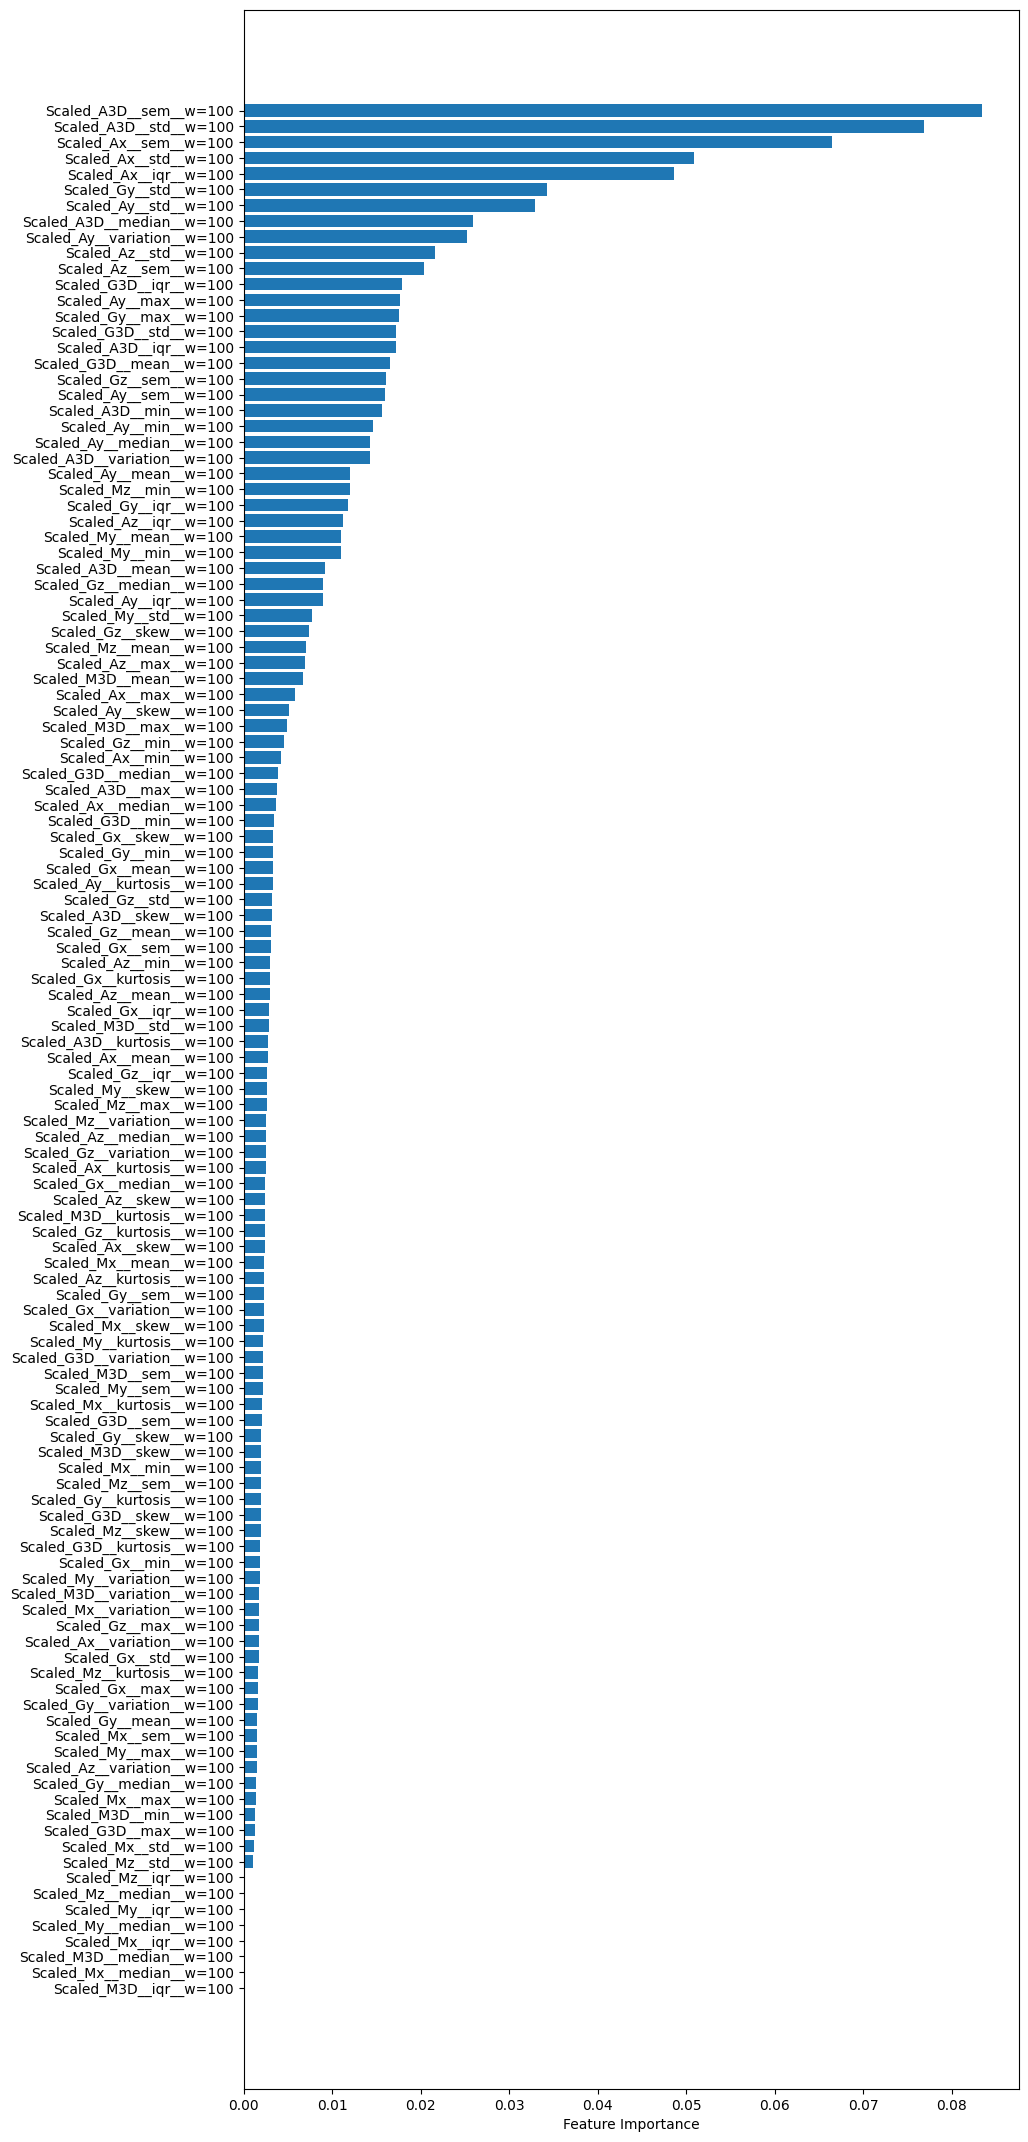

In [77]:
indices = np.argsort(importances)

plt.figure(figsize=(10, 27))

plt.barh(range(len(indices)), importances[indices], align='center')

plt.xlabel('Feature Importance')
plt.yticks(range(len(indices)), features1.columns[indices])
plt.show()

*If we observe above bar plot of feature importance, we can see that there are some features with high feature-importance-scores which makes them critical in selecting features. In above scenario, I would select first 25 features **(upto Scaled_My_mean)**. Though there are other features with some scores (eg. 25th onwards), I would not select them and assume them as a trade-off, as their scores seem less than 0.01 , and including them will only use our computational resource*


***Let's have a look into top 25 features with their importance scores***

In [78]:
sorted_indices = np.argsort(importances)[::-1]

top_25_indices = sorted_indices[:25]
top_25_features = features1.columns[top_25_indices]
top_25_importances = importances[top_25_indices]

top_25_df = pd.DataFrame({'Feature': top_25_features, 'Importance': top_25_importances})
print(top_25_df)

                         Feature  Importance
0         Scaled_A3D__sem__w=100    0.083391
1         Scaled_A3D__std__w=100    0.076861
2          Scaled_Ax__sem__w=100    0.066425
3          Scaled_Ax__std__w=100    0.050880
4          Scaled_Ax__iqr__w=100    0.048635
5          Scaled_Gy__std__w=100    0.034249
6          Scaled_Ay__std__w=100    0.032906
7      Scaled_A3D__median__w=100    0.025902
8    Scaled_Ay__variation__w=100    0.025226
9          Scaled_Az__std__w=100    0.021620
10         Scaled_Az__sem__w=100    0.020396
11        Scaled_G3D__iqr__w=100    0.017921
12         Scaled_Ay__max__w=100    0.017619
13         Scaled_Gy__max__w=100    0.017540
14        Scaled_G3D__std__w=100    0.017186
15        Scaled_A3D__iqr__w=100    0.017175
16       Scaled_G3D__mean__w=100    0.016561
17         Scaled_Gz__sem__w=100    0.016091
18         Scaled_Ay__sem__w=100    0.015983
19        Scaled_A3D__min__w=100    0.015590
20         Scaled_Ay__min__w=100    0.014672
21      Sc

## STEP 4

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#training our model using top 25 features
top_25_features_data = features1[top_25_features]
X_train_top_25, X_test_top_25 = train_test_split(top_25_features_data, test_size=0.2, random_state=42)

model_top_25 = RandomForestClassifier(n_estimators=20, random_state=10)
model_top_25.fit(X_train_top_25, y_train)

# Predict on the test set
y_pred_top_25 = model_top_25.predict(X_test_top_25)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_top_25, average='weighted')
recall = recall_score(y_test, y_pred_top_25, average='weighted')
f1 = f1_score(y_test, y_pred_top_25, average='weighted')
accuracy = accuracy_score(y_test, y_pred_top_25)

# Print evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.9144803325063906
Recall: 0.9144773616545556
F1 Score: 0.9117419863245909
Accuracy: 0.9144773616545556


***After training our model with top 25 features, we got the following results***

*Precision: 0.9186788160125953*

*Recall: 0.9189491335941867*

*F1 Score: 0.9164787746486502*

*Accuracy: 0.9189491335941867*

**Now, let's plot ROC curve and Precision-recall curve.**

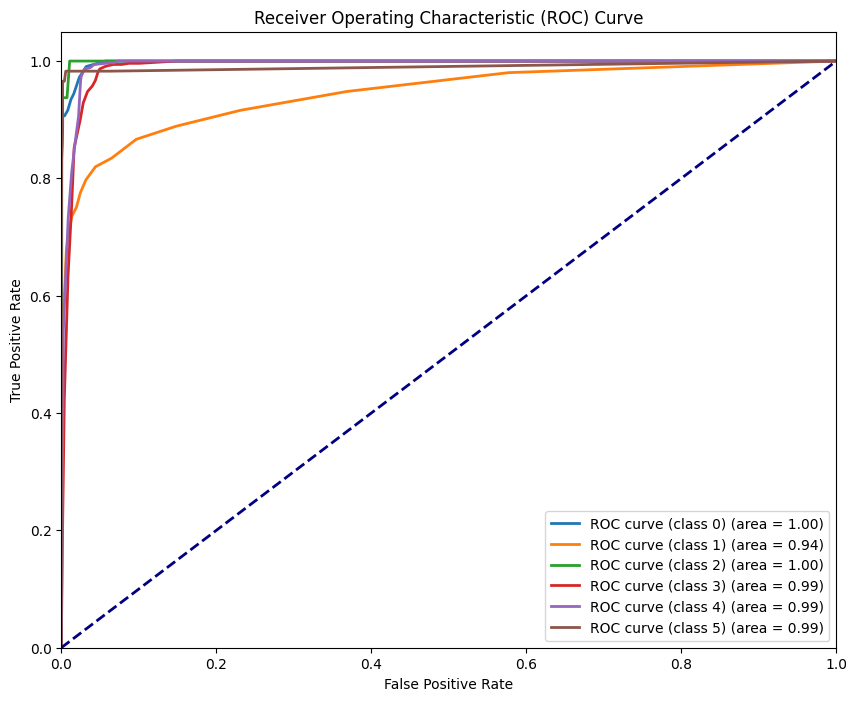

In [80]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


y_pred_proba = cls.predict_proba(X_test)

#binarizing
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# computing ROC curve and ROC area for each class
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In our label_encoded column, we have 6 classes ( 'standing': '0', 'unknown': '1', 'walking-natural': '2', 'walking-rider': '3', 'trotting-rider': '4', 'galloping-rider': '5').

***If we look into ROC curve, class 0 (standing) and class 2 (walking-natural)  have the highest AUC i.e. 1. Also, class 3/4/5 (walking-rider/trotting-rider/galloping-rider) have AUC = 0.99, which is also higher than class 2 (unknown). It overall indicates that these classes have the higher area under the curve. It means our model has a high true positive rate (sensitivity) and a low false positive rate (1-specificity) indicating very strong predictive performance for these particular classes.***

**Now, let's plot Precision-Recall curve**

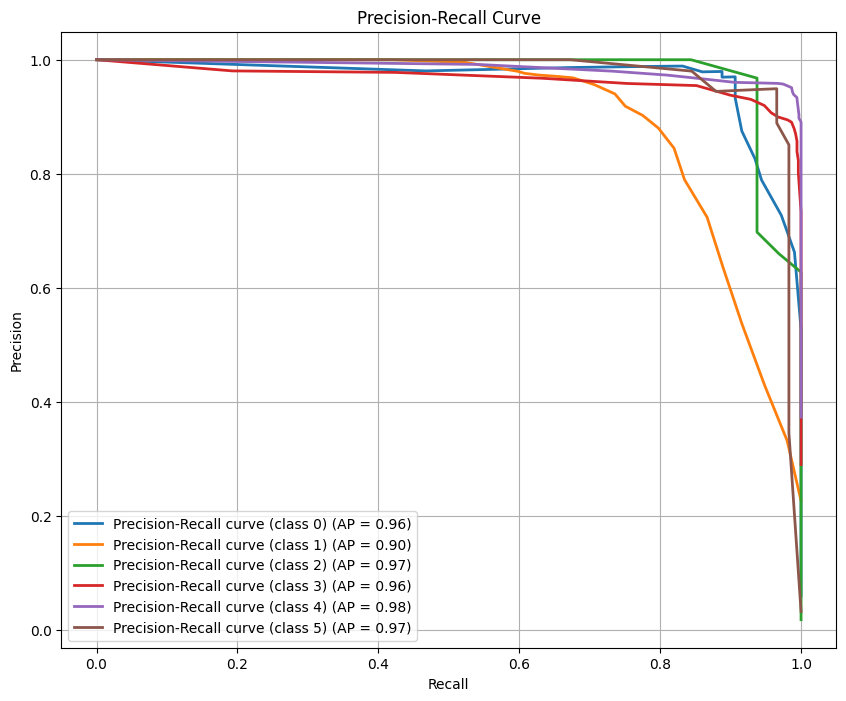

In [81]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# computing precision-recall pairs for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])

# plot Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Precision-Recall curve (class {i}) (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


***Above PR-curve shows that all the classes have higher AP value (0.90 or higher). It means our model is performing well for all the classes. However, if we observe closely, all classes except class 1  have AP value 0.96 or higher. It indicates our model performs exceptionally well for these particular classes and can achieve higher precision across various recall levels.***

## THANK YOU